In [1]:
#pip3 install fastf1

import fastf1 as ff1
import matplotlib.pyplot as plt
import fastf1.plotting
from fastf1 import utils

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import numpy as np
import pandas as pd

# FastF1's default color scheme
fastf1.plotting.setup_mpl()

# load a session and its telemetry data

year, grand_prix, session = 2023, 'Bahrain', 'Q'

quali = ff1.get_session(year, grand_prix, session)
quali.load()

api         WARNING 	

NO CACHE! Api caching has not been enabled! 
	It is highly recommended to enable this feature for much faster data loading!
	Use `fastf1.Cache.enable_cache('path/to/cache/')`

core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v2.3.0]
api            INFO 	Fetching driver list...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
api            INFO 	Fetching car data...
api            INFO 	Parsing car data...
api            INFO 	Fetching position data...
api            INFO 	Parsing position data...
api            INFO 	Fetching weather data...
api            INFO 	Fetching race control messages...
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '16', '55', '14', '63', '44', '18', '31'

In [2]:
driver_1, driver_2 = 'SAI', 'LEC'

plot_title = f"{quali.event.year} {quali.event.EventName} - {quali.name} - {driver_1} VS {driver_2}"

laps_driver_1 = quali.laps.pick_driver(driver_1)
laps_driver_2 = quali.laps.pick_driver(driver_2)

# Select the fastest lap
fastest_driver_1 = laps_driver_1.pick_fastest()
fastest_driver_2 = laps_driver_2.pick_fastest()

# Retrieve the telemetry and add the distance column
telemetry_driver_1 = fastest_driver_1.get_telemetry().add_distance()
telemetry_driver_2 = fastest_driver_2.get_telemetry().add_distance()

team_driver_1 = fastest_driver_1['Team']
team_driver_2 = fastest_driver_2['Team']

delta_time, ref_tel, compare_tel = utils.delta_time(fastest_driver_1, fastest_driver_2)

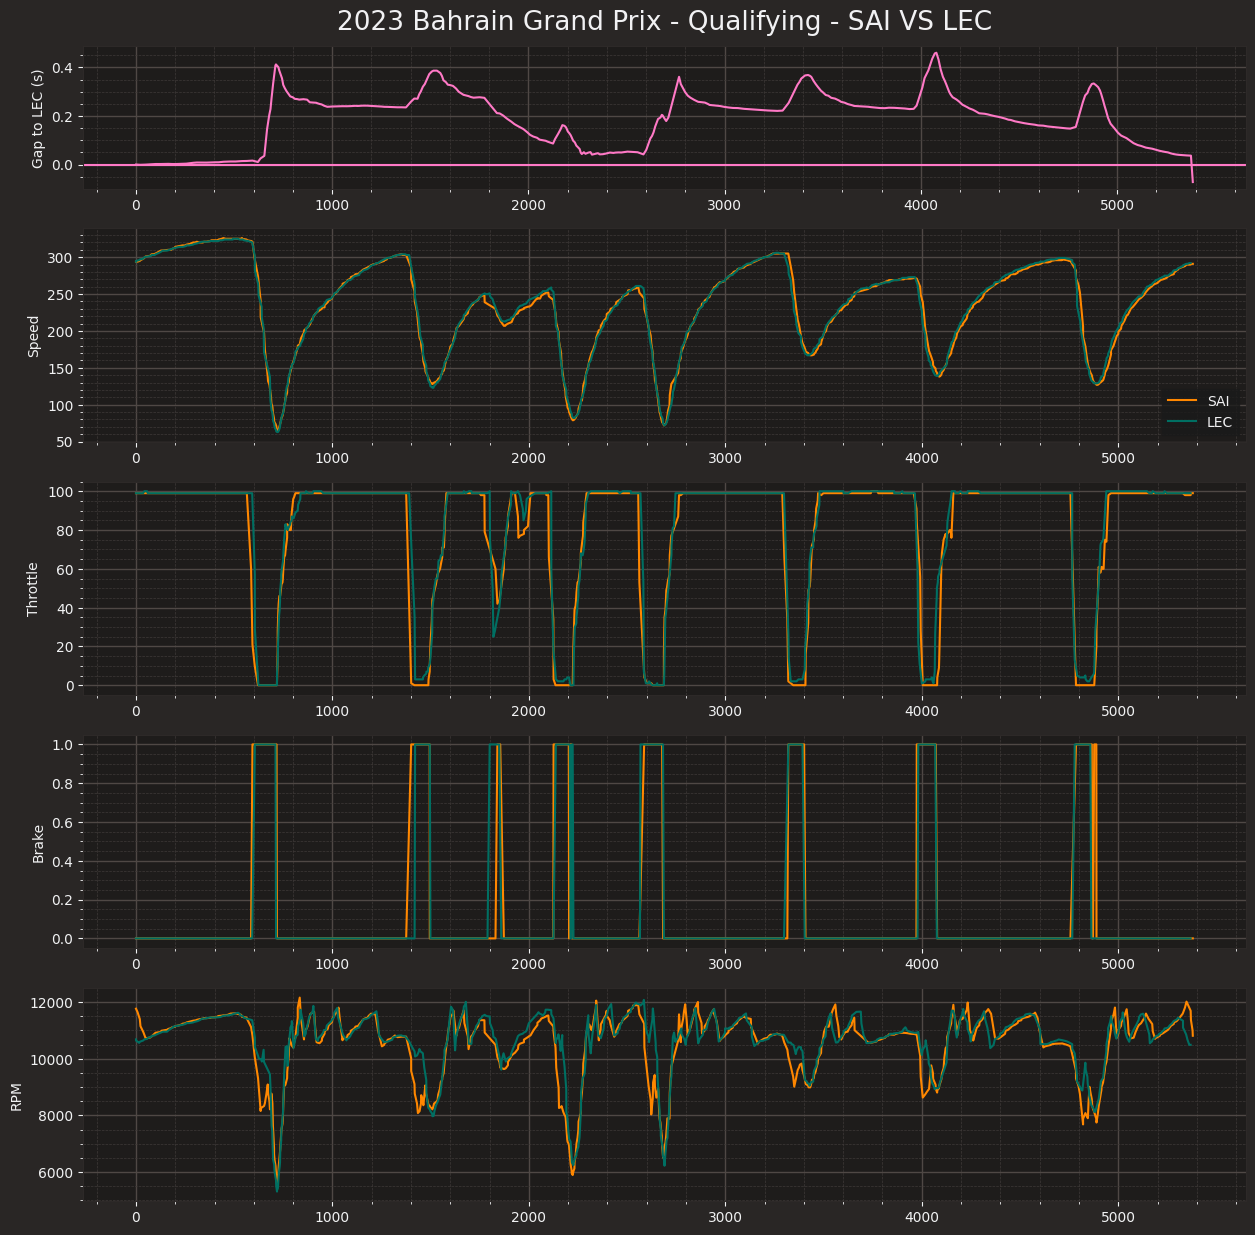

In [4]:
rbr_color = fastf1.plotting.team_color('MCL')
mer_color = fastf1.plotting.team_color('AST')
plot_ratios = [2, 3, 3, 3, 3]
plot_filename = plot_title.replace(" ", "") + ".png"

#Make it bigger!!!
plot_size = [15, 15]
plt.rcParams['figure.figsize'] = plot_size


fig, ax = plt.subplots(5, gridspec_kw={'height_ratios': plot_ratios})


ax[0].title.set_text(plot_title)

# Delta line
ax[0].plot(ref_tel['Distance'], delta_time)
ax[0].axhline(0)
ax[0].set(ylabel=f"Gap to {driver_2} (s)")

#Speed Trace
ax[1].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Speed'], color=rbr_color, label=driver_1)
ax[1].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Speed'], color=mer_color, label=driver_2)
ax[1].set(ylabel='Speed')
ax[1].legend(loc="lower right")

# Throttle trace
ax[2].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Throttle'], label=driver_1, color=rbr_color)
ax[2].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Throttle'], label=driver_2, color=mer_color)
ax[2].set(ylabel='Throttle')

# Brake trace
ax[3].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Brake'], label=driver_1, color=rbr_color)
ax[3].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Brake'], label=driver_2, color=mer_color)
ax[3].set(ylabel='Brake')

# RPM trace
ax[4].plot(telemetry_driver_1['Distance'], telemetry_driver_1['RPM'], label=driver_1, color=rbr_color)
ax[4].plot(telemetry_driver_2['Distance'], telemetry_driver_2['RPM'], label=driver_2, color=mer_color)
ax[4].set(ylabel='RPM')

plt.savefig(plot_filename, dpi=600)
plt.show()